In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
weather_data = pd.read_csv('data/df/all_df.csv')

In [43]:
weather_data

,Unnamed: 0,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
0,1,2021,11,26,0,0,-2.7,5.8,67,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2,2021,11,26,0,1,-2.9,5.8,67,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,3,2021,11,26,0,2,-3.0,5.7,67,0.9,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,4,2021,11,26,0,3,-3.0,5.7,67,1.3,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,5,2021,11,26,0,4,-2.8,5.7,67,0.9,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152635,152636,2022,3,20,23,55,-3.0,6.2,61,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152636,152637,2022,3,20,23,56,-3.2,6.2,61,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152637,152638,2022,3,20,23,57,-3.2,6.1,61,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152638,152639,2022,3,20,23,58,-3.3,6.1,61,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


column이름에 붙어있는 smart_farm. 부분 제거

In [44]:
for colname in weather_data.columns:
    newName = colname[11:]
    print(newName)
    weather_data.rename(columns={colname:newName},inplace=True)


yy
mm
dd
hh
nn
insolation
out_tmperature
out_humidity
wind_speed
wind_direction
in_tmperature
in_humidity
shield_light_h
shield_tmperature_h
shield_energy_h
shield_energy_v
exhaust_fan
ceiling
floating_fan
fan_coil_b_site
ventilation_temperature_control
heating_temperature_set_up
heat_supply


In [45]:
# 날짜 Index가 여러개 있어서 하나로 정리하고싶을 때 실행
# date = all_df[['yy','mm','dd','hh','nn']].astype(str).apply('-'.join,axis=1)
date = weather_data[['yy','mm','dd']].astype(str).apply('-'.join,axis=1)
time = weather_data[['hh','nn']].astype(str).apply(':'.join,axis=1)
datetime = date + ' ' + time

In [46]:
weather_data.insert(loc=0,column='Dates',value=datetime)
weather_data.insert(loc=1,column='Date',value=date)
weather_data['Dates'] = pd.to_datetime(weather_data['Dates'],format='%Y-%m-%d %H:%M', errors='raise')
weather_data['Date'] = pd.to_datetime(weather_data['Date'],format='%Y-%m-%d', errors='raise')

In [47]:
weather_data = weather_data.drop(['Date','yy','mm','dd','hh','nn','Date'],axis=1)

In [48]:
weather_data = weather_data.set_index(['Dates'])

In [49]:
weather_data_dropna = weather_data.dropna(axis=0)

In [50]:
weather_data_dropna

,,insolation,out_tmperature,out_humidity,wind_speed,wind_direction,in_tmperature,in_humidity,shield_light_h,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,heat_supply
Dates,,,,,,,,,,,,,,,,,,,
2021-11-26 00:00:00,1,-2.7,5.8,67,0.0,325,18.30,62.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2021-11-26 00:01:00,2,-2.9,5.8,67,0.4,344,18.10,63.400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2021-11-26 00:02:00,3,-3.0,5.7,67,0.9,105,17.70,65.200,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
2021-11-26 00:03:00,4,-3.0,5.7,67,1.3,123,17.70,63.900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
2021-11-26 00:04:00,5,-2.8,5.7,67,0.9,123,17.60,64.700,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28 23:55:00,132476,-2.7,4.1,51,0.0,57,18.15,70.560,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
2022-02-28 23:56:00,132477,-2.7,4.1,52,0.4,57,18.05,72.215,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
2022-02-28 23:57:00,132478,-2.7,4.1,52,0.4,40,18.20,70.705,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8


In [76]:
weather_data_5mean = pd.DataFrame()
# 5분 단위로 만드려면 '5T', 10분 단위면 '10T' 이런식으로 하면 됨 
timeunit = '1T'
weather_data_5mean['insolation'] = weather_data.insolation.resample(timeunit).mean()
weather_data_5mean['out_tmperature'] = weather_data.out_tmperature.resample(timeunit).mean()
weather_data_5mean['out_humidity'] = weather_data.out_humidity.resample(timeunit).mean()
weather_data_5mean['wind_speed'] = weather_data.wind_speed.resample(timeunit).mean()
weather_data_5mean['wind_direction'] = weather_data.wind_direction.resample(timeunit).mean()
weather_data_5mean['in_tmperature'] = weather_data.in_tmperature.resample(timeunit).mean()
weather_data_5mean['in_humidity'] = weather_data.in_humidity.resample(timeunit).mean()
weather_data_5mean['shield_light_h'] = weather_data.shield_light_h.resample(timeunit).mean()
weather_data_5mean['shield_tmperature_h'] = weather_data.shield_tmperature_h.resample(timeunit).mean()
weather_data_5mean['shield_energy_h'] = weather_data.shield_energy_h.resample(timeunit).mean()
weather_data_5mean['shield_energy_v'] = weather_data.shield_energy_v.resample(timeunit).mean()
weather_data_5mean['exhaust_fan'] = weather_data.exhaust_fan.resample(timeunit).mean()
weather_data_5mean['ceiling'] = weather_data.ceiling.resample(timeunit).mean()
weather_data_5mean['floating_fan'] = weather_data.floating_fan.resample(timeunit).mean()
weather_data_5mean['fan_coil_b_site'] = weather_data.fan_coil_b_site.resample(timeunit).mean()
weather_data_5mean['ventilation_temperature_control'] = weather_data.ventilation_temperature_control.resample(timeunit).mean()
weather_data_5mean['heating_temperature_set_up'] = weather_data.heating_temperature_set_up.resample(timeunit).mean()
weather_data_5mean['heat_supply'] = weather_data.heat_supply.resample(timeunit).mean()

In [52]:
weather_data_5mean.head()

,insolation,out_tmperature,out_humidity,wind_speed,wind_direction,in_tmperature,in_humidity,shield_light_h,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,heat_supply
Dates,,,,,,,,,,,,,,,,,,
2021-11-26 00:00:00,-2.7,5.8,67.0,0.0,325.0,18.3,62.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2021-11-26 00:01:00,-2.9,5.8,67.0,0.4,344.0,18.1,63.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2021-11-26 00:02:00,-3.0,5.7,67.0,0.9,105.0,17.7,65.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
2021-11-26 00:03:00,-3.0,5.7,67.0,1.3,123.0,17.7,63.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
2021-11-26 00:04:00,-2.8,5.7,67.0,0.9,123.0,17.6,64.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0


In [54]:
weather_data_5mean_dropna = weather_data_5mean.dropna(axis=0)

In [55]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split #데이터를 트레이닝,테스트 셋 나누는 것 
from sklearn.linear_model import LinearRegression  #선형회기를 하기 위한 
from sklearn.metrics import mean_squared_error #모델을 평가하기 위해 사용하는 평균 제곱 오차 

import pandas as pd

X = weather_data_5mean_dropna.iloc[:,:-1].values
y=weather_data_5mean_dropna['heat_supply'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model = LinearRegression()

model.fit(X_train, y_train)
model.coef_  #이제 학습된 결과를 보고 싶을 때  각각  θ1, θ2, θ3 나타낸다. 
model.intercept_ #θ0을 나타낸다. , 손실을 최대한 적게하는 θ 값들

y_test_prediction = model.predict(X_test)
y_test_prediction #예측 값들 

print(mean_squared_error(y_test, y_test_prediction)  ** 0.5)

from sklearn.linear_model import LinearRegression

r_square = model.score(X_test, y_test)
print('R-square',r_square)
print('\n')
print('x변수의 기울기 : ',model.coef_)
print('\n')
print('절편 : ', model.intercept_)
print('\n')

0.26739651110568735
R-square 0.28146404034342276


x변수의 기울기 :  [-9.57158144e-06  6.94652814e-03 -2.40217168e-04  1.84299252e-03
  4.34443290e-05 -3.91522375e-02 -4.56128628e-03  3.99468068e-04
  5.51159594e-04  2.70636228e-05 -1.20308101e-03  4.29155878e-02
 -2.63594282e-04  1.51050682e-02  2.12605824e-01  2.15837142e-02
  1.26128062e-02]


절편 :  0.4450290488595337




In [56]:
X = weather_data_5mean_dropna.iloc[:,:-1].values
y = weather_data_5mean_dropna['heat_supply'].values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.3, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
r_square = lr.score(X_test, y_test)
print('R-square',r_square)
print('\n')
print('x변수의 기울기 : ',lr.coef_)
print('\n')
print('절편 : ', lr.intercept_)
print('\n')

R-square 0.2758167474181896


x변수의 기울기 :  [ 1.92799619e-06  7.09410173e-03 -1.46946562e-04  2.23066052e-03
  4.44459140e-05 -3.97114843e-02 -4.40703518e-03  4.94497252e-04
  5.40306229e-04 -2.84466859e-05 -1.30290124e-03  4.50206714e-02
 -2.60629454e-04  1.25325682e-02  2.12077782e-01  2.49549797e-02
  1.24360120e-02]


절편 :  0.34957818348201114




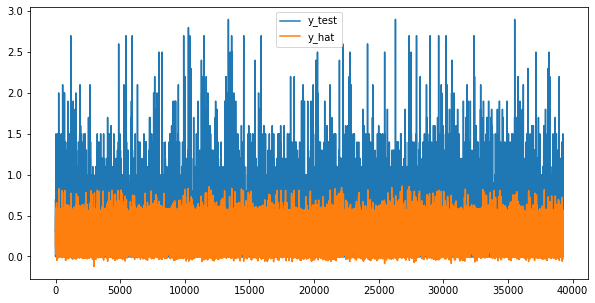

In [57]:
import matplotlib.pyplot as plt
y_hat = lr.predict(X_test)
plt.figure(figsize = (10,5))
plt.plot(y_test, label='y_test')
plt.plot(y_hat, label='y_hat')
plt.legend(loc='upper center')
plt.show()

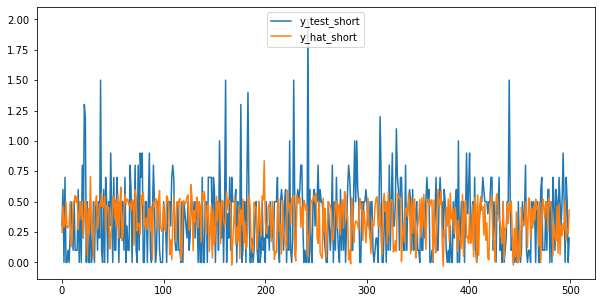

In [58]:
y_hat = model.predict(X_train)
y_test_short = y_test[:500]
y_hat_short = y_hat[:500]
plt.figure(figsize = (10,5))
plt.plot(y_test_short, label='y_test_short')
plt.plot(y_hat_short, label='y_hat_short')
plt.legend(loc='upper center')
plt.show()

sklearn으로 만든 결과 좀 이상한 거 같아서 다른 패키지 이용해서 한번 더 확인

In [59]:
import pandas as pd
import statsmodels.formula.api as sm

In [60]:
result = sm.ols(formula='heat_supply ~ insolation + out_tmperature + out_humidity + wind_speed + wind_direction + in_tmperature + in_humidity+ shield_light_h + shield_tmperature_h + shield_energy_h + shield_energy_v + exhaust_fan + ceiling + floating_fan + fan_coil_b_site + ventilation_temperature_control + heating_temperature_set_up', data = weather_data_dropna).fit()


In [61]:
print(result.params)
print(result.pvalues)
print(result.rsquared)
print(result.predict())

Intercept                          0.397349
insolation                        -0.000002
out_tmperature                     0.007178
out_humidity                      -0.000263
wind_speed                         0.001936
wind_direction                     0.000042
in_tmperature                     -0.039559
in_humidity                       -0.004442
shield_light_h                     0.000443
shield_tmperature_h                0.000523
shield_energy_h                   -0.000011
shield_energy_v                   -0.001249
exhaust_fan                        0.043839
ceiling                           -0.000262
floating_fan                       0.014760
fan_coil_b_site                    0.212066
ventilation_temperature_control    0.022916
heating_temperature_set_up         0.013247
dtype: float64
Intercept                           2.943383e-23
insolation                          8.555455e-01
out_tmperature                     8.801291e-173
out_humidity                        3.665238e-

몰겠다..

실내온도와 열공급량의 시차상관계수 구하기

In [62]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

heat_supply = weather_data_5mean_dropna['heat_supply']
in_tmperature = weather_data_5mean_dropna['in_tmperature']
cc = sm.tsa.stattools.ccf(heat_supply, in_tmperature)


In [63]:
print(cc[0],cc[1],cc[2],cc[3],cc[4],cc[5],cc[6],cc[7],cc[8],cc[9],cc[10])

-0.43290470228039585 -0.4361859347918271 -0.43827741485454524 -0.439064225817748 -0.4389931803361099 -0.43807026831549056 -0.43648789620819484 -0.43453477085549097 -0.4323193847388448 -0.43001263097120807 -0.4279095727164347


In [64]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

heat_supply = weather_data_5mean_dropna['heat_supply']
in_tmperature = weather_data_5mean_dropna['in_tmperature']
cc = sm.tsa.stattools.ccf(in_tmperature, heat_supply)

In [65]:
print(cc[0],cc[1],cc[2],cc[3],cc[4],cc[5],cc[6],cc[7],cc[8],cc[9],cc[10])

-0.43290470228039585 -0.42915555150151774 -0.42525102250267494 -0.42185515670010026 -0.4191075300080278 -0.4173727317594683 -0.4165078040820147 -0.41652887549472456 -0.41736181147020646 -0.418718405644171 -0.4203986430790236


실내온도랑 팬코일

In [66]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

in_tmperature = weather_data_5mean_dropna['in_tmperature']
fan_coil_b_site = weather_data_5mean_dropna['fan_coil_b_site']
cc = sm.tsa.stattools.ccf(fan_coil_b_site, in_tmperature)

In [67]:
print(cc[0],cc[1],cc[2],cc[3],cc[4],cc[5],cc[6],cc[7],cc[8],cc[9],cc[10])

-0.2989435082771946 -0.30163463430701326 -0.30271665975241835 -0.30230178027114485 -0.30062011746126305 -0.29812775636879335 -0.29525473711164074 -0.29232192686750236 -0.2897289171298801 -0.2877381223326042 -0.2865406482005703


In [68]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

in_tmperature = weather_data_5mean_dropna['in_tmperature']
fan_coil_b_site = weather_data_5mean_dropna['fan_coil_b_site']
cc = sm.tsa.stattools.ccf(in_tmperature, fan_coil_b_site)

In [69]:
print(cc[0],cc[1],cc[2],cc[3],cc[4],cc[5],cc[6],cc[7],cc[8],cc[9],cc[10])

-0.29894350827719457 -0.29291520146316324 -0.28590477217980115 -0.2788101165159821 -0.27250294590046287 -0.26734020320282004 -0.26357914374353597 -0.2613001352430836 -0.26035357835736295 -0.2605582412122397 -0.26170731377856155


열공급량의 자기상관계수

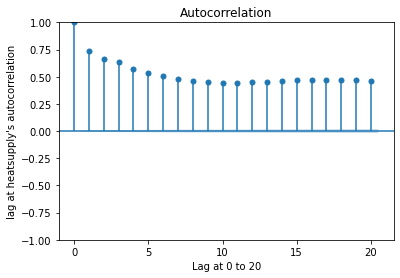

In [70]:
def acf_plot(data, N_LAGS, alpha):
    from statsmodels.graphics.tsaplots import plot_acf
    
    fig = plot_acf(data, lags=N_LAGS, alpha=alpha)
    plt.xlabel(f'Lag at 0 to {N_LAGS}')
    plt.ylabel("lag at heatsupply's autocorrelation")
    plt.show()
    
acf_plot(heat_supply.values, 20, 0.05)

<AxesSubplot:>

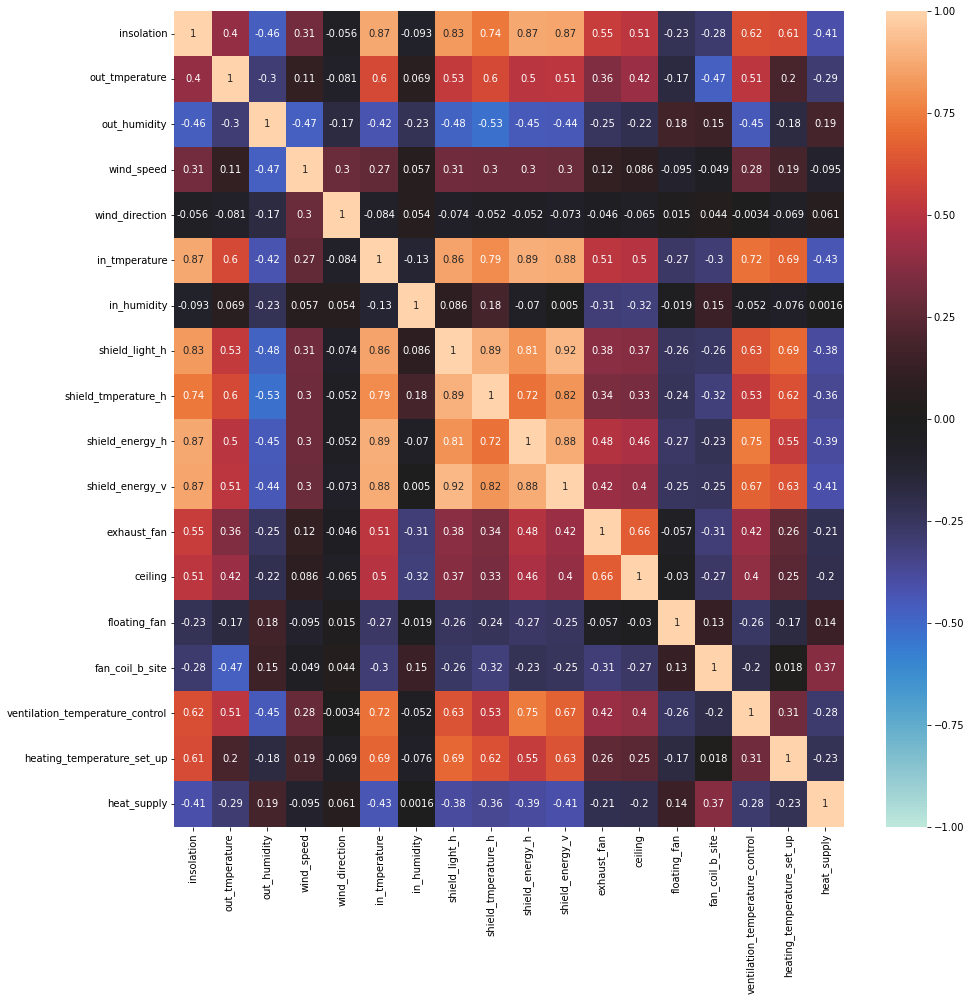

In [71]:
import seaborn as sns
weather_5mean_corr = weather_data_5mean_dropna.corr()
plt.figure(figsize=(15,15))
sns.heatmap(weather_5mean_corr,vmax=1, vmin=-1, center=0, annot=True)

<AxesSubplot:>

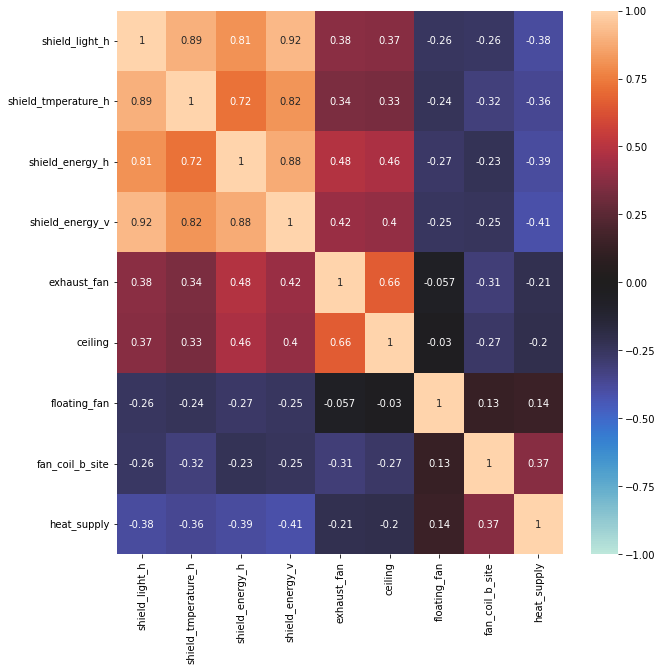

In [73]:
List_Control = ['shield_light_h','shield_tmperature_h','shield_energy_h','shield_energy_v','exhaust_fan','ceiling','floating_fan','fan_coil_b_site','heat_supply']
weather_5mean_corr = weather_data_5mean_dropna[List_Control].corr()
plt.figure(figsize=(10,10))
sns.heatmap(weather_5mean_corr,vmax=1, vmin=-1, center=0, annot=True)

In [75]:
# 여기서 window는 몇 개로 meanaverage 낼 것인지 정하는 계수
weather_data_meanaverage = weather_data.rolling(window=5).mean()
weather_data_meanaverage_dropna = weather_data_meanaverage.dropna()
weather_data_meanaverage_dropna.head()

,,insolation,out_tmperature,out_humidity,wind_speed,wind_direction,in_tmperature,in_humidity,shield_light_h,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,heat_supply
Dates,,,,,,,,,,,,,,,,,,,
2021-11-26 00:04:00,3.0,-2.88,5.74,67.0,0.70,204.0,17.88,63.84,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6,28.0,18.0,0.90
2021-11-26 00:05:00,4.0,-2.90,5.72,67.2,0.88,163.2,17.76,64.14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8,28.0,18.0,0.92
2021-11-26 00:06:00,5.0,-2.88,5.70,67.2,0.98,120.4,17.70,64.08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.92
2021-11-26 00:07:00,6.0,-2.84,5.70,67.2,0.98,130.0,17.76,63.64,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.90
2021-11-26 00:08:00,7.0,-2.78,5.70,67.2,0.72,136.4,17.86,63.24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.92


5개짜리 meanaverage 써도 그렇게 평탄화 되지는 않는 듯?

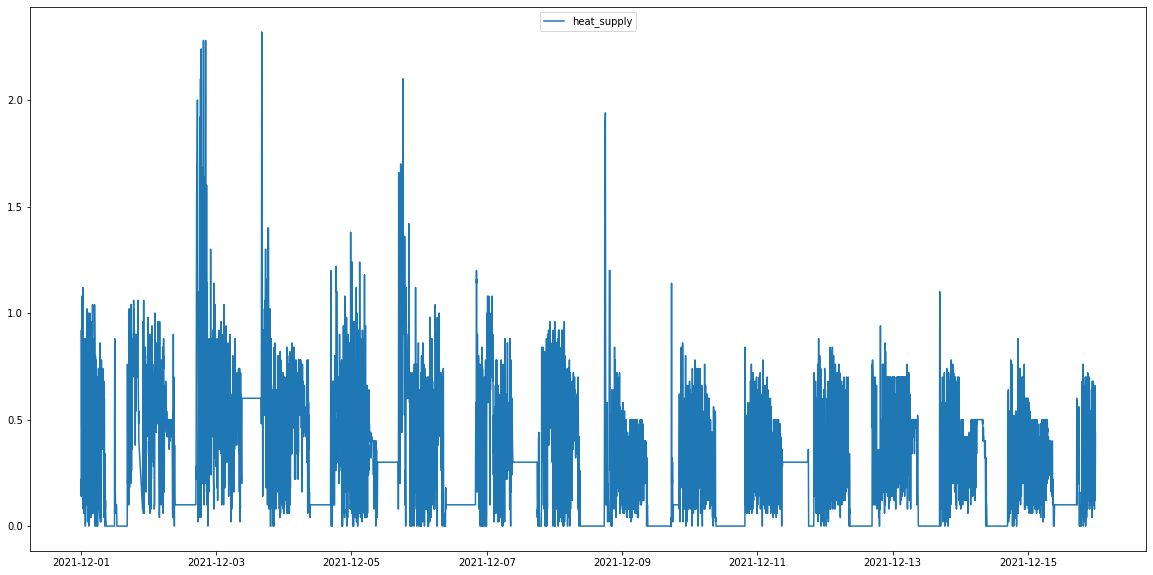

In [77]:
plt.figure(figsize = (20,10))
plt.plot(weather_data_meanaverage_dropna['heat_supply']['2021-12-01':'2021-12-15'], label='heat_supply')
plt.legend(loc='upper center')
plt.show()